## Adidas Sales -Exploratory Data Analysis

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#loading the dataset
df = pd.read_csv('C:\\Users\\olajide\\Desktop\\Adidas Sales EDA\\adidas_data_sales.csv')

In [3]:
# showing starting rows
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet


In [4]:
# shape of the dataset
df.shape

(9641, 12)

In [3]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


In [6]:
# checking for null values
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [6]:
df.describe(include = object)

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
count,9641,9641,9641,9641,9641,9641,9639,9641,9641,9641,9641
unique,6,724,5,50,52,7,94,361,1710,1530,3
top,Foot Locker,1/17/2021,West,California,Portland,Men's Street Footwear,$50.00,225,"10,000","$6,300",Online
freq,2634,77,2446,430,360,1610,674,207,66,39,4889


In [7]:
# drop rows have missing value in Price per units column

df.dropna(subset = "Price per Unit", inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9639 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9639 non-null   object
 1   Retailer ID       9639 non-null   int64 
 2   Invoice Date      9639 non-null   object
 3   Region            9639 non-null   object
 4   State             9639 non-null   object
 5   City              9639 non-null   object
 6   Product           9639 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9639 non-null   object
 9   Total Sales       9639 non-null   object
 10  Operating Profit  9639 non-null   object
 11  Sales Method      9639 non-null   object
dtypes: int64(1), object(11)
memory usage: 979.0+ KB


### 1. Visualising `Retailer` column

In [10]:
df['Retailer'].unique()

array(['Walmart', 'West Gear', 'Sports Direct', 'Foot Locker', 'Amazon',
       "Kohl's"], dtype=object)

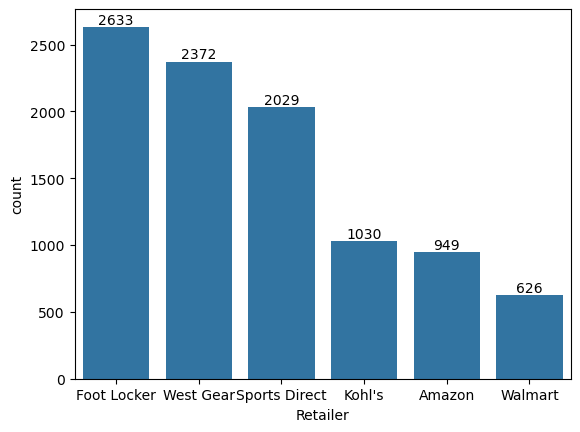

In [11]:
retailer_graph = sns.countplot(x = "Retailer", data = df, order = df.Retailer.value_counts().index)
for container in retailer_graph.containers:
    retailer_graph.bar_label(container)
plt.show()

### 2. Discover `Invoice Date` column

In [12]:
df['Invoice Date'].unique()[:10]

array(['6/17/2021', '7/16/2021', '8/25/2021', '8/27/2021', '8/21/2021',
       '1/11/2021', '11/17/2021', '1/23/2021', '4/3/2021', '3/10/2020'],
      dtype=object)

In [13]:
# convert date type to datetime

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Invoice Date']

0      2021-06-17
1      2021-07-16
2      2021-08-25
3      2021-08-27
4      2021-08-21
          ...    
9636   2021-11-18
9637   2021-10-22
9638   2021-10-22
9639   2021-04-10
9640   2021-10-05
Name: Invoice Date, Length: 9639, dtype: datetime64[ns]

In [14]:
# extract month

df['Month'] = df['Invoice Date'].dt.month
df['Month']

0        6
1        7
2        8
3        8
4        8
        ..
9636    11
9637    10
9638    10
9639     4
9640    10
Name: Month, Length: 9639, dtype: int32

In [15]:
# extract year

df['Year'] = df['Invoice Date'].dt.year
df['Year']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
9636    2021
9637    2021
9638    2021
9639    2021
9640    2021
Name: Year, Length: 9639, dtype: int32

In [16]:
# extract day

df['Day'] = df['Invoice Date'].dt.day
df['Day']

0       17
1       16
2       25
3       27
4       21
        ..
9636    18
9637    22
9638    22
9639    10
9640     5
Name: Day, Length: 9639, dtype: int32

In [17]:
# create season column

def seasons(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Automn'

df['Season'] = df['Month'].apply(seasons)
df['Season']

0       Summer
1       Summer
2       Summer
3       Summer
4       Summer
         ...  
9636    Automn
9637    Automn
9638    Automn
9639    Spring
9640    Automn
Name: Season, Length: 9639, dtype: object

In [18]:
df['Season'].unique()

array(['Summer', 'Winter', 'Automn', 'Spring'], dtype=object)

In [33]:
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month_name()

In [34]:
df['Month']

0           June
1           July
2         August
3         August
4         August
          ...   
9636    November
9637     October
9638     October
9639       April
9640     October
Name: Month, Length: 9639, dtype: object

In [43]:
df.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
0,Walmart,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online,June,2021,17,Summer
1,West Gear,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online,July,2021,16,Summer
2,Sports Direct,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet,August,2021,25,Summer
3,Sports Direct,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet,August,2021,27,Summer
4,Sports Direct,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet,August,2021,21,Summer


In [36]:
# droping inrelevant columns

df.drop(columns = ['Retailer ID', 'Invoice Date'], inplace = True)

In [37]:
df.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
0,Walmart,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online,June,2021,17,Summer
1,West Gear,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online,July,2021,16,Summer
2,Sports Direct,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet,August,2021,25,Summer
3,Sports Direct,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet,August,2021,27,Summer
4,Sports Direct,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet,August,2021,21,Summer


In [44]:
# covert some column datatype

df['Day'] = df['Day'].astype('category')

df['Season'] = df['Season'].astype('category')

df['Year'] = df['Year'].astype('category')

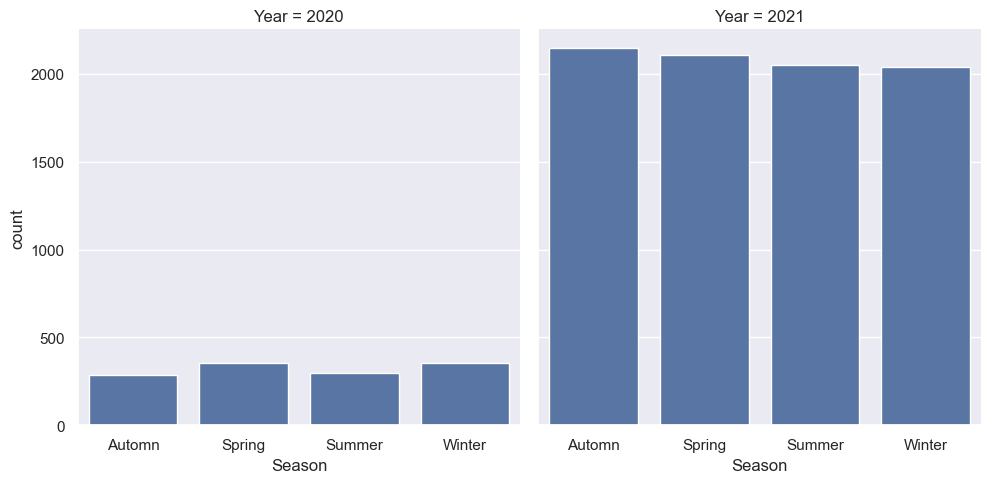

In [46]:
plot = sns.catplot(x = 'Season', col = 'Year', data = df, kind = 'count')
plt.show()

### 3. Discover `Region` column

In [47]:
df['Region'].unique()

array(['Southeast', 'South', 'Midwest', 'Northeast', 'West'], dtype=object)

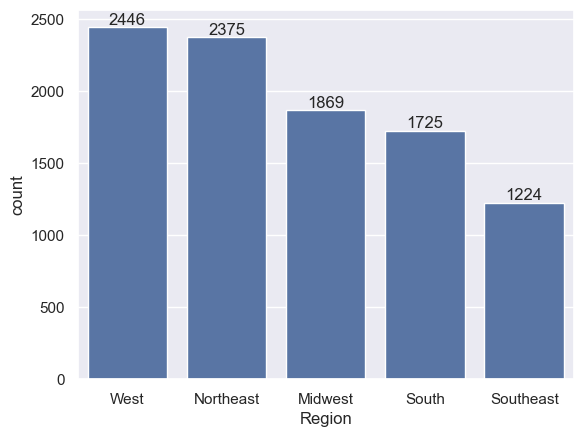

In [49]:
plot = sns.countplot(x = 'Region', data = df, order = df.Region.value_counts().index)
for container in plot.containers:
    plot.bar_label(container)
plt.show()

### 4. Discover `State` column

In [50]:
df['State'].unique()

array(['Florida', 'Louisiana', 'Alabama', 'Missouri', 'Mississippi',
       'Wisconsin', 'New York', 'Michigan', 'Utah', 'Ohio', 'Arkansas',
       'Georgia', 'Texas', 'Oklahoma', 'West Virginia', 'California',
       'South Carolina', 'Kansas', 'Tennessee', 'North Carolina', 'Idaho',
       'Indiana', 'New Jersey', 'Oregon', 'South Dakota', 'North Dakota',
       'Iowa', 'Maryland', 'Delaware', 'Washington', 'Virginia',
       'Wyoming', 'Minnesota', 'Kentucky', 'Connecticut', 'Rhode Island',
       'Massachusetts', 'New Mexico', 'Nevada', 'Illinois', 'Nebraska',
       'Maine', 'Arizona', 'Vermont', 'New Hampshire', 'Hawaii',
       'Montana', 'Colorado', 'Pennsylvania', 'Alaska'], dtype=object)

In [51]:
df['State'].nunique()

50

C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\1031263732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  state_plot = sns.countplot(x = 'State', data = df, order = df.State.value_counts()[:10].index, palette = 'RdBu')


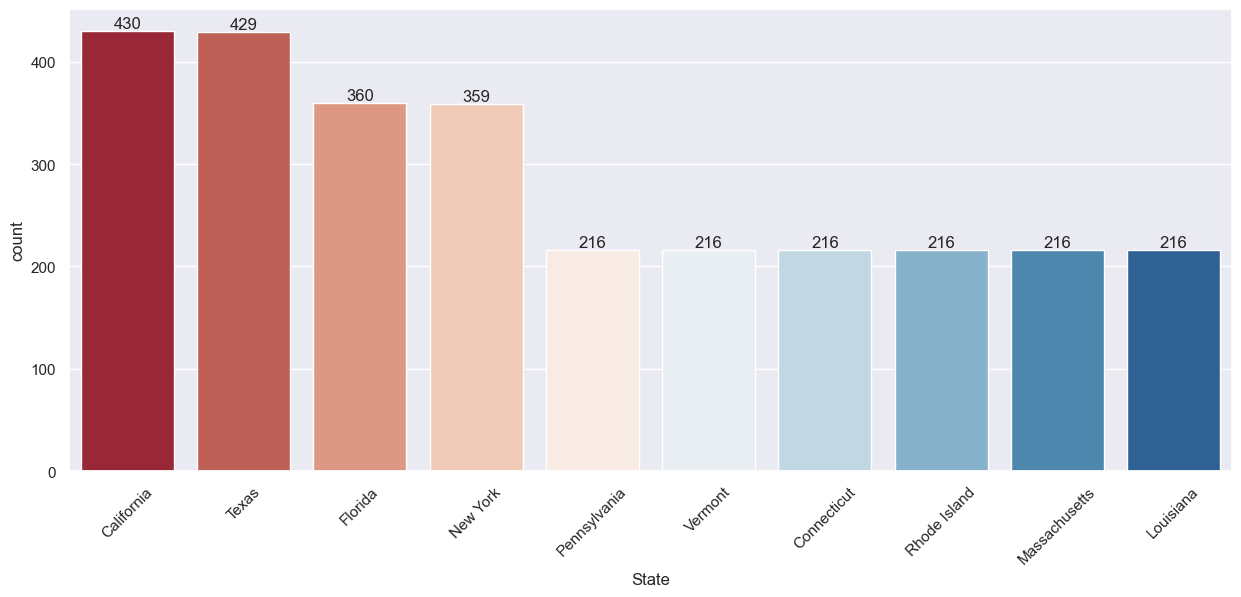

In [56]:
plt.figure(figsize = (15,6))
state_plot = sns.countplot(x = 'State', data = df, order = df.State.value_counts()[:10].index, palette = 'RdBu')
for container in state_plot.containers:
    state_plot.bar_label(container)

plt.xticks(rotation = 45)
plt.show()

### 5. Discover `City` column

In [57]:
df['City'].unique()

array(['Orlando', 'New Orleans', 'Birmingham', 'St. Louis', 'Jackson',
       'Milwaukee', 'New York', 'Detroit', 'Salt Lake City', 'Columbus',
       'Little Rock', 'Atlanta', 'Houston', 'Oklahoma City', 'Charleston',
       'San Francisco', 'Dallas', 'Wichita', 'Miami', 'Knoxville',
       'Los Angeles', 'Charlotte', 'Boise', 'Indianapolis', 'Newark',
       'Portland', 'Sioux Falls', 'Fargo', 'Des Moines', 'Baltimore',
       'Wilmington', 'Seattle', 'Richmond', 'Albany', 'Cheyenne',
       'Minneapolis', 'Louisville', 'Hartford', 'Providence', 'Boston',
       'Albuquerque', 'Las Vegas', 'Chicago', 'Omaha', 'Phoenix',
       'Burlington', 'Manchester', 'Honolulu', 'Billings', 'Denver',
       'Philadelphia', 'Anchorage'], dtype=object)

In [58]:
df['City'].nunique()

52

C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\3672893314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  city_plot = sns.countplot(x = 'City', data = df, order = df.City.value_counts()[:10].index, palette = 'RdBu')


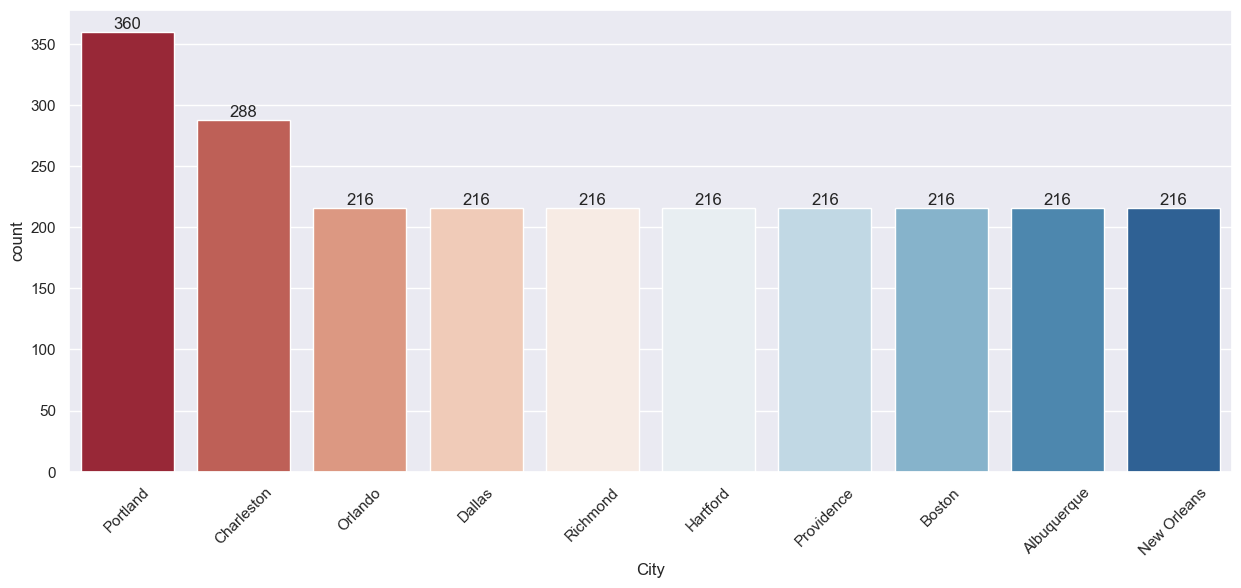

In [59]:
plt.figure(figsize = (15,6))
city_plot = sns.countplot(x = 'City', data = df, order = df.City.value_counts()[:10].index, palette = 'RdBu')
for container in city_plot.containers:
    city_plot.bar_label(container)

plt.xticks(rotation = 45)
plt.show()

### 6. Discover `Product` column

In [61]:
df['Product'].unique()

array(["Women's Apparel", "Men's Street Footwear",
       "Women's Street Footwear", "Men's Athletic Footwear",
       "Women's Athletic Footwear", "Men's Apparel", "Men's aparel"],
      dtype=object)

In [63]:
# found ["Men's Apparel", "Men's aparel"] 
# replace 

df['Product'] = df['Product'].replace("Men's aparel", "Men's Apparel")

In [66]:
print(df['Product'].nunique())
print('-' * 20)
print(df['Product'].unique())

6
--------------------
["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"]


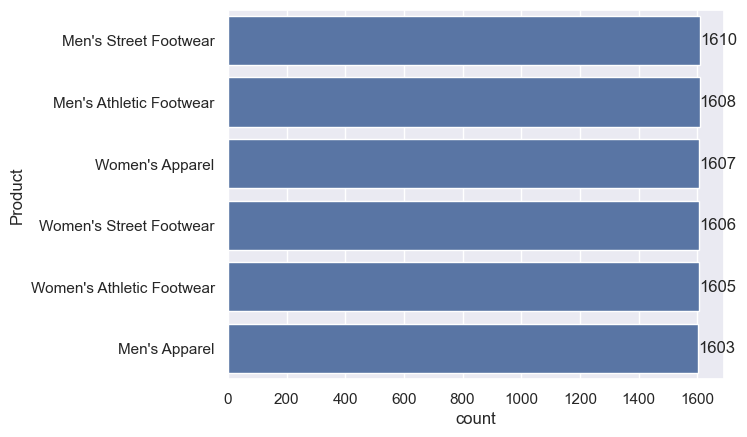

In [74]:
Product_plot = sns.countplot(y = 'Product', data = df, order = df.Product.value_counts()[:10].index)
for container in Product_plot.containers:
    Product_plot.bar_label(container)

sns.set_style("darkgrid")
plt.show()

### 7. Discover `Price per Unit` column

In [75]:
df['Price per Unit'].unique()

array(['$103.00 ', '$10.00 ', '$15.00 ', '$20.00 ', '$44.00 ', '$48.00 ',
       '$39.00 ', '$46.00 ', '$47.00 ', '$40.00 ', '$33.00 ', '$34.00 ',
       '$31.00 ', '$41.00 ', '$29.00 ', '$56.00 ', '$37.00 ', '$25.00 ',
       '$32.00 ', '$36.00 ', '$43.00 ', '$45.00 ', '$38.00 ', '$26.00 ',
       '$42.00 ', '$35.00 ', '$50.00 ', '$62.00 ', '$58.00 ', '$63.00 ',
       '$53.00 ', '$30.00 ', '$59.00 ', '$54.00 ', '$28.00 ', '$24.00 ',
       '$27.00 ', '$55.00 ', '$61.00 ', '$23.00 ', '$60.00 ', '$64.00 ',
       '$51.00 ', '$52.00 ', '$68.00 ', '$67.00 ', '$86.00 ', '$66.00 ',
       '$49.00 ', '$74.00 ', '$83.00 ', '$69.00 ', '$57.00 ', '$79.00 ',
       '$73.00 ', '$65.00 ', '$22.00 ', '$80.00 ', '$21.00 ', '$12.00 ',
       '$77.00 ', '$72.00 ', '$76.00 ', '$13.00 ', '$70.00 ', '$82.00 ',
       '$19.00 ', '$88.00 ', '$7.00 ', '$14.00 ', '$71.00 ', '$16.00 ',
       '$17.00 ', '$87.00 ', '$18.00 ', '$81.00 ', '$78.00 ', '$9.00 ',
       '$92.00 ', '$85.00 ', '$90.00 ', '$89.00 ', '

In [ ]:
# removing currency symbol '$'

def removecurrency(price):
    return price.replace('$', '')

df['Price per Unit'] = df['Price per Unit'].apply(removecurrency)
df['Price per Unit']

In [77]:
# convert data type to numeric

df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors = 'coerce')

In [78]:
# check NaN value after assign error equal to "coerce"

df['Price per Unit'].isna().sum()

0

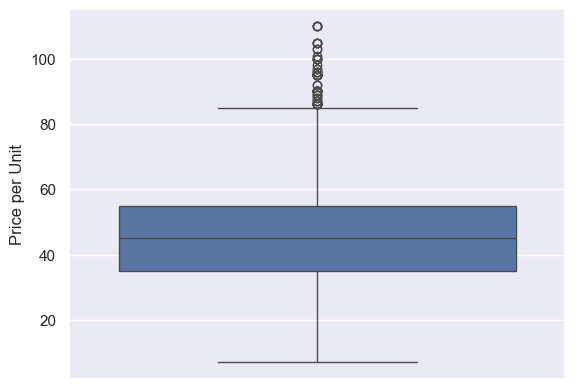

In [79]:
sns.boxplot(y = 'Price per Unit', data = df)
plt.show()

### 8. Discover `Unit Sold` column

In [80]:
df['Units Sold'].unique()[-50:]

array(['1,250', '1,220', '1,200', '1,150', '1,125', '1,075', '975', '925',
       '900', '875', '650', '600', '1,100', '1,070', '1,050', '1,045',
       '1,025', '1,020', '1,000', '950', '945', '920', '870', '850',
       '825', '820', '800', '795', '775', '770', '745', '725', '720',
       '695', '675', '670', '645', '625', '620', '595', '570', '550',
       '545', '525', '520', '500', '495', '470', '445', '395'],
      dtype=object)

In [83]:
# removing comma with empty string

def replace_comman(Unit):
    return Unit.replace(',', '')

df['Units Sold'] = df['Units Sold'].apply(replace_comman)
df['Units Sold']

0       218
1       163
2       700
3       575
4       475
       ... 
9636    150
9637    150
9638    150
9639    150
9640    150
Name: Units Sold, Length: 9639, dtype: object

In [84]:
# convert data type to integer

df['Units Sold'] = df['Units Sold'].astype('int')

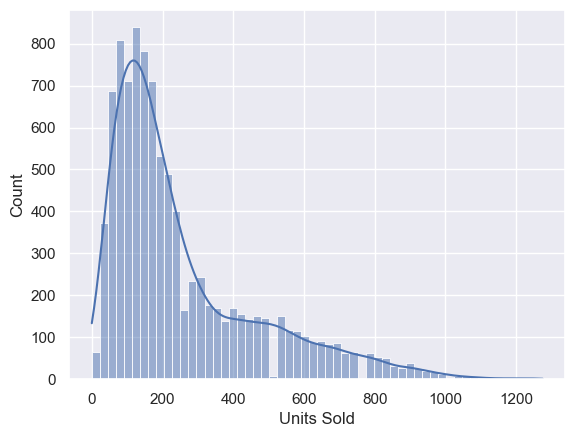

In [87]:
sns.histplot(data = df, x = 'Units Sold', kde=True)
plt.show()

In [89]:
# Droping the rows where sales were 0, as it didn't relevant for our analysis

df = df[df['Units Sold'] != 0]

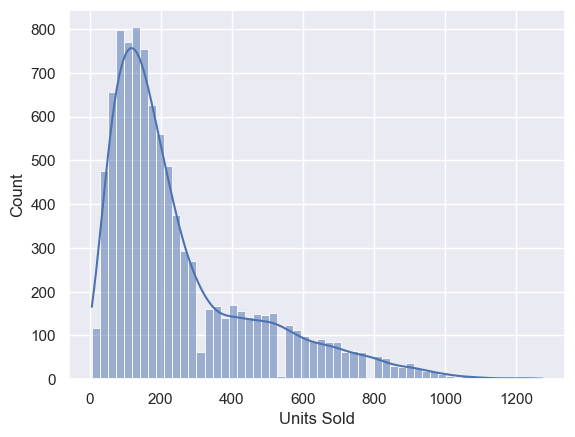

In [90]:
sns.histplot(data = df, x = 'Units Sold', kde=True)
plt.show()

### 9. Discover `Sales Method` column

In [92]:
print(df['Sales Method'].unique())

['Online' 'Outlet' 'In-store']


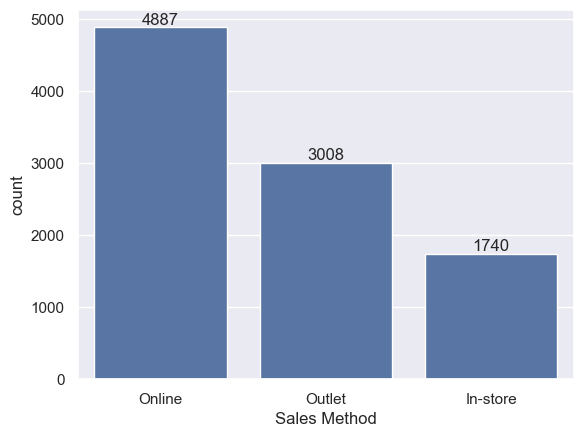

In [93]:
sales_plot = sns.countplot(x = 'Sales Method', data = df, order = df['Sales Method'].value_counts().index)
for container in sales_plot.containers:
    sales_plot.bar_label(container)
plt.show()

### 9. Discover `Operating Profit` column

In [94]:
df['Operating Profit'].unique()

array(['$1,257 ', '$806 ', '$3,150 ', ..., '$4,290 ', '$7,394 ',
       '$2,925 '], dtype=object)

In [97]:
# remove $ symbol & comma with empty string

df['Operating Profit'] = df['Operating Profit'].apply(removecurrency)
df['Operating Profit'] = df['Operating Profit'].apply(replace_comman)
df['Operating Profit']

0       1257 
1        806 
2       3150 
3       3881 
4       3206 
        ...  
9636    2438 
9637    2438 
9638    2813 
9639    2925 
9640    2925 
Name: Operating Profit, Length: 9635, dtype: object

In [99]:
# convert data type to numeric

df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors = 'coerce', downcast = 'float')
df['Operating Profit']

0       1257.0
1        806.0
2       3150.0
3       3881.0
4       3206.0
         ...  
9636    2438.0
9637    2438.0
9638    2813.0
9639    2925.0
9640    2925.0
Name: Operating Profit, Length: 9635, dtype: float32

### 10. Correct `Total Sales` column values

In [105]:
# replace comman in Total sales column

df['Total Sales'] = df['Total Sales'].apply(replace_comman)

# converting data type to numeric
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors = 'coerce')

In [111]:
# Correct Values

df['Total Sales'] = df['Price per Unit'] * df['Units Sold']

### 11. Create `profit percentage` column

In [110]:
# create column

df['Profit Percentage'] = (df['Operating Profit'] / df['Total Sales']) * 100

In [109]:
# round values of column 

df['Profit Percentage'] = df['Profit Percentage'].astype('float').round()

In [117]:
# calculate profits

df['Operating Profit'] = (df['Total Sales'] * (df['Profit Percentage'] / 100)).round()

## Summary

**Data Cleaning and Preparation**

This analysis involved a comprehensive data cleaning process to ensure data accuracy and consistency.

- **Handling Missing Values:** Rows with missing values in the Price per Unit column were removed due to the insignificance of these values.

- **Feature Engineering:**
    - The Invoice Date column was decomposed into Year, Month, and Day components.
    - A new Season feature was derived based on the Month column.
    - This engineered Season feature was subsequently dropped from the analysis.
- **Data Standardization:**
    - The Product column was carefully examined and corrected for inconsistencies arising from minor spelling errors.
    - The Price per Unit column was cleaned by removing the dollar sign ($) and converting the data type to numeric.
    - The Units Sold column was processed by removing commas and converting the data type to integer.
    - Rows with zero values in Units Sold were identified as potential returns and subsequently removed from the dataset.
    - The Total Sales column was cleaned by removing commas and converting the data type to numeric.
        - Anomalies were detected in Total Sales and corresponding discrepancies in the Operating Profit column.
        - These inconsistencies were addressed through meticulous calculations and the creation of auxiliary columns to facilitate accurate data correction.

This rigorous cleaning process ensured the quality and reliability of the data, laying a solid foundation for subsequent exploratory data analysis and model building.

## **Exploratory Data Analysis**

In [118]:
df.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season,Profit Percentage
0,Walmart,Southeast,Florida,Orlando,Women's Apparel,103.0,218,22454.0,12572.0,Online,June,2021,17,Summer,55.991091
1,West Gear,South,Louisiana,New Orleans,Women's Apparel,103.0,163,16789.0,8060.0,Online,July,2021,16,Summer,48.004765
2,Sports Direct,South,Alabama,Birmingham,Men's Street Footwear,10.0,700,7000.0,3150.0,Outlet,August,2021,25,Summer,45.000000
3,Sports Direct,South,Alabama,Birmingham,Women's Street Footwear,15.0,575,8625.0,3881.0,Outlet,August,2021,27,Summer,44.997101
4,Sports Direct,South,Alabama,Birmingham,Women's Street Footwear,15.0,475,7125.0,3206.0,Outlet,August,2021,21,Summer,44.996491


In [129]:
# Create function to group each column with Total Sales and Operating Profit

def groupData(columnName):
    return df.groupby(columnName).agg({'Total Sales' : sum, 'Operating Profit' : 'sum'})

C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\4096128690.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  return df.groupby(columnName).agg({'Total Sales' : sum, 'Operating Profit' : 'sum'})


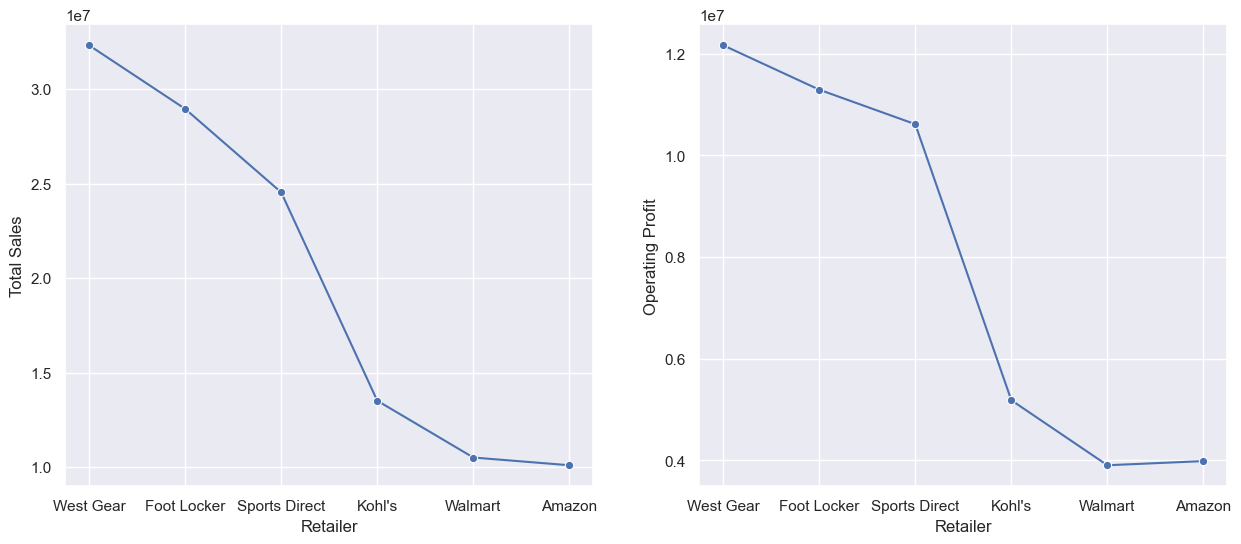

In [130]:
# What is total sales, Operating Profit in each Retailer ?

RetailerSales = groupData('Retailer').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales 
plt.subplot(1, 2, 1)
sns.lineplot(x = RetailerSales.index, y = "Total Sales", data = RetailerSales, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = RetailerSales.index, y = "Operating Profit", data = RetailerSales, marker='o')

plt.show()

-  `West Gear` and `Foot locker` emerge as the top retailers, capturing 27% and 24% of sales, respectively.

In [131]:
# Show Total Sales and Operating Profit

RetailerSales['sales percentage'] = (RetailerSales['Total Sales'] / RetailerSales['Total Sales'].sum()) * 100
RetailerSales

,Total Sales,Operating Profit,sales percentage
Retailer,,,
West Gear,32317808.0,12168781.0,26.948288
Foot Locker,28953945.0,11294712.0,24.143322
Sports Direct,24537997.0,10615050.0,20.461072
Kohl's,13512453.0,5182072.0,11.267394
Walmart,10506085.0,3902749.0,8.760526
Amazon,10096987.0,3984349.0,8.419399


C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\4096128690.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  return df.groupby(columnName).agg({'Total Sales' : sum, 'Operating Profit' : 'sum'})


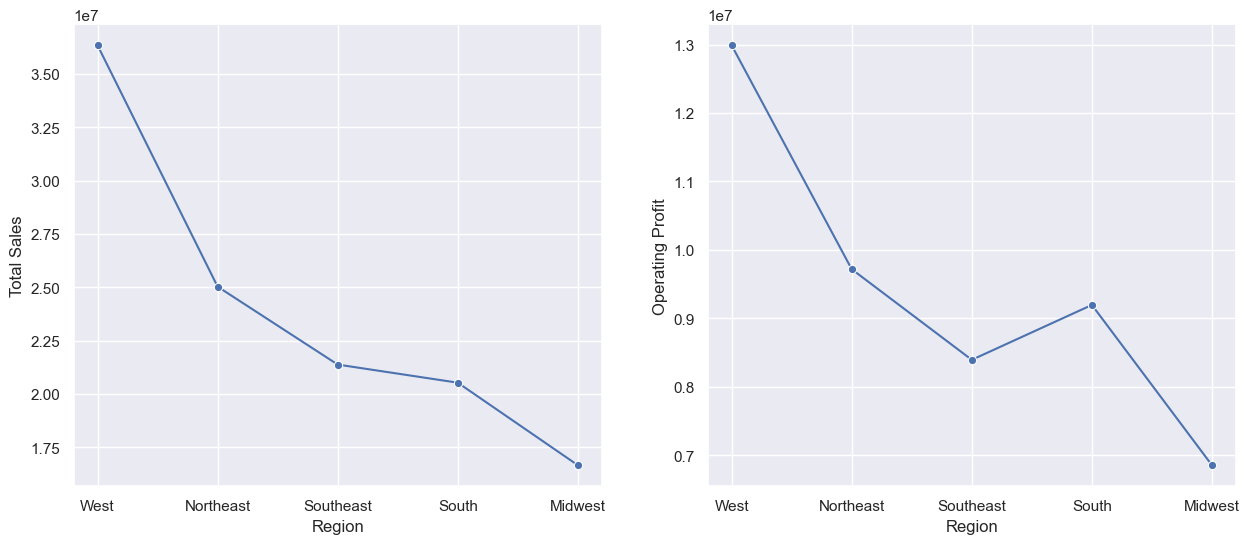

In [132]:
# What is total sales, Operating Profit in each Region ?

RegionSales = groupData('Region').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales 
plt.subplot(1, 2, 1)
sns.lineplot(x = RegionSales.index, y = "Total Sales", data = RegionSales, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = RegionSales.index, y = "Operating Profit", data = RegionSales, marker='o')

plt.show()

- `West` and `Northeast` emerge as the top Region, capture 30% and 21% of sales  respectively.

In [133]:
# Show Total Sales and Operating Profit

RegionSales['sales percentage'] = ((RegionSales['Total Sales'] / RegionSales['Total Sales'].sum()) * 100).round()
RegionSales

,Total Sales,Operating Profit,sales percentage
Region,,,
West,36344407.0,12989478.0,30.0
Northeast,25027267.0,9717288.0,21.0
Southeast,21374436.0,8393072.0,18.0
South,20524731.0,9195080.0,17.0
Midwest,16654434.0,6852795.0,14.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\4096128690.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  return df.groupby(columnName).agg({'Total Sales' : sum, 'Operating Profit' : 'sum'})


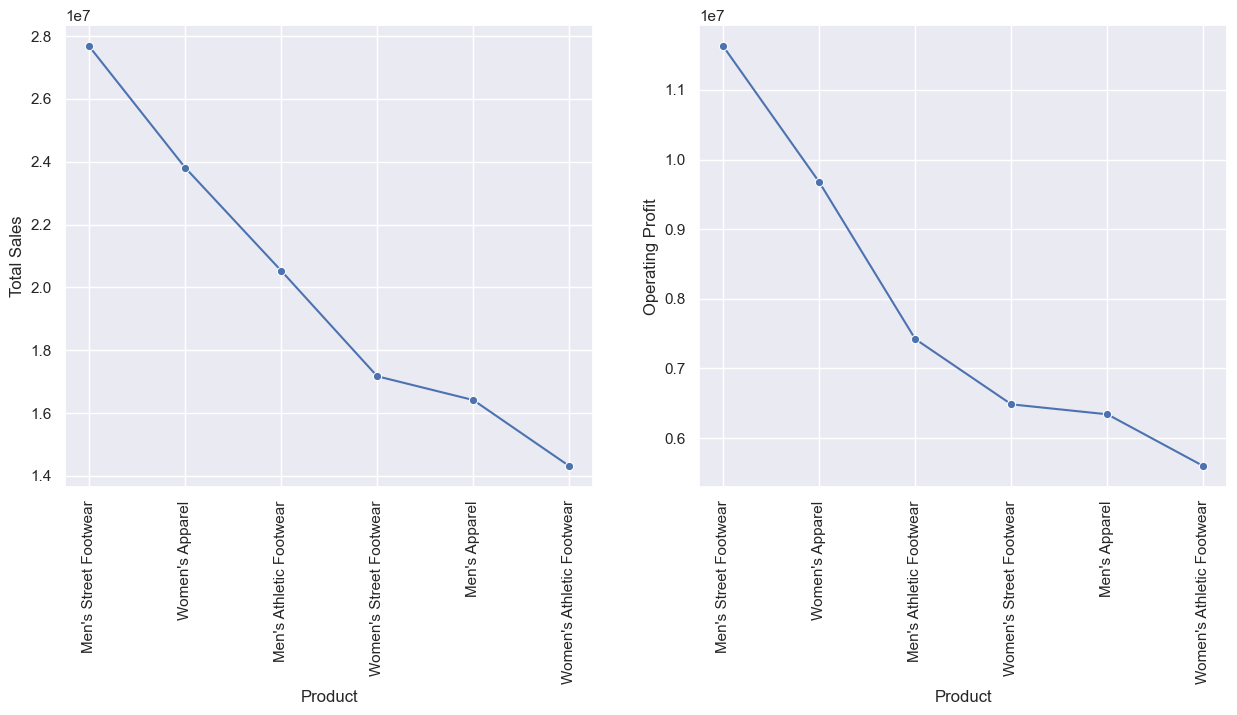

In [134]:
# What is total sales, Operating Profit in each Product ?

ProductSales = groupData('Product').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales 
plt.subplot(1, 2, 1)
sns.lineplot(x = ProductSales.index, y = "Total Sales", data = ProductSales, marker = "o")
plt.xticks(rotation = 90)


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = ProductSales.index, y = "Operating Profit", data = ProductSales, marker='o')
plt.xticks(rotation = 90)

plt.show()

- Top product categories such as `Men’s Street Footwear`, `Women’s Apparel`, and `Men’s Athletic Footwear`, which collectively account for 60% of total sales

In [135]:
# Show Total Sales and Operating Profit

ProductSales['sales percentage'] = ((ProductSales['Total Sales'] / ProductSales['Total Sales'].sum()) * 100).round()
ProductSales

,Total Sales,Operating Profit,sales percentage
Product,,,
Men's Street Footwear,27680769.0,11629098.0,23.0
Women's Apparel,23814985.0,9676817.0,20.0
Men's Athletic Footwear,20532180.0,7421644.0,17.0
Women's Street Footwear,17171938.0,6483731.0,14.0
Men's Apparel,16413882.0,6340315.0,14.0
Women's Athletic Footwear,14311521.0,5596108.0,12.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\4096128690.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(columnName).agg({'Total Sales' : sum, 'Operating Profit' : 'sum'})
C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\4096128690.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  return df.groupby(columnName).agg({'Total Sales' : sum, 'Operating Profit' : 'sum'})


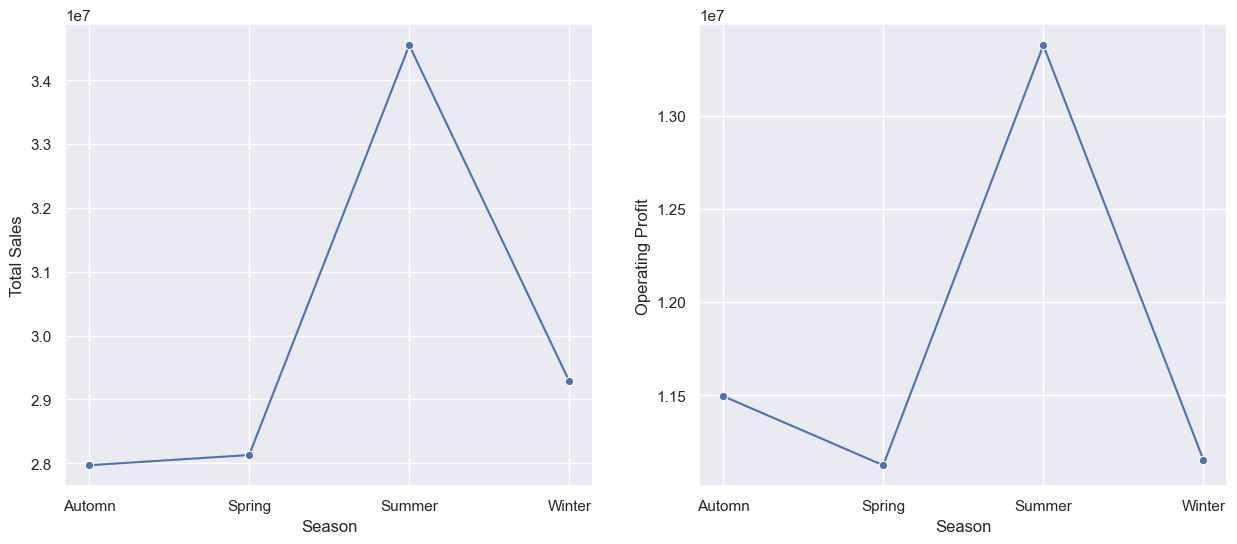

In [136]:
# What is total sales, Operating Profit in each Season ?

SeasonSales = groupData('Season').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales 
plt.subplot(1, 2, 1)
sns.lineplot(x = SeasonSales.index, y = "Total Sales", data = SeasonSales, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = SeasonSales.index, y = "Operating Profit", data = SeasonSales, marker='o')

plt.show()

- Sales increase in the `summer` and `winter` seasons, which represent 29% and 24%  of sales respectively.It may be due to school season or recreational breaks on the beach.

In [138]:
# Show Total Sales and Operating Profit

SeasonSales['sales percentage'] = ((SeasonSales['Total Sales'] / SeasonSales['Total Sales'].sum()) * 100).round()
SeasonSales

,Total Sales,Operating Profit,sales percentage
Season,,,
Summer,34548167.0,13378905.0,29.0
Winter,29281202.0,11151172.0,24.0
Spring,28128124.0,11123184.0,23.0
Automn,27967782.0,11494452.0,23.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\4096128690.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  return df.groupby(columnName).agg({'Total Sales' : sum, 'Operating Profit' : 'sum'})


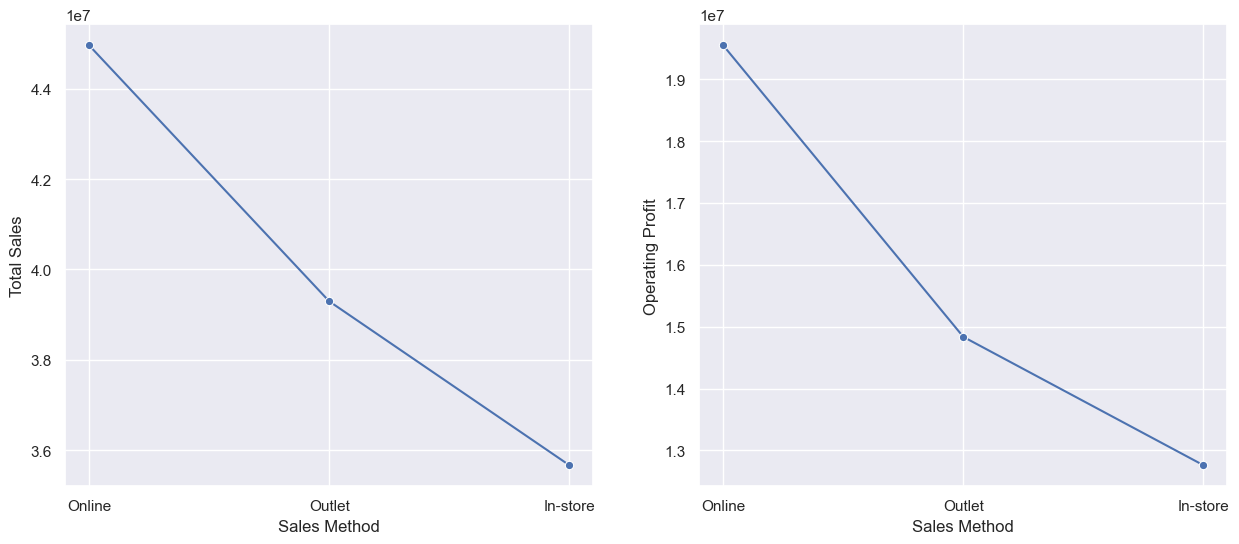

In [139]:
# What is total sales, Operating Profit in each Sales Method ?

SalesMethod = groupData('Sales Method').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales 
plt.subplot(1, 2, 1)
sns.lineplot(x = SalesMethod.index, y = "Total Sales", data = SalesMethod, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = SalesMethod.index, y = "Operating Profit", data = SalesMethod, marker='o')

plt.show()

-  The `online sales method` ranked first with a percentage 37%, followed by `Outlet Sales method` with a percentage 33%

In [140]:
# Show Total Sales and Operating Profit

SalesMethod['sales percentage'] = ((SalesMethod['Total Sales'] / SalesMethod['Total Sales'].sum()) * 100).round()
SalesMethod

,Total Sales,Operating Profit,sales percentage
Sales Method,,,
Online,44965657.0,19552242.0,37.0
Outlet,39295243.0,14836197.0,33.0
In-store,35664375.0,12759274.0,30.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\4010748776.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_month = df.groupby(['Year','Month'])['Total Sales'].sum().reset_index()


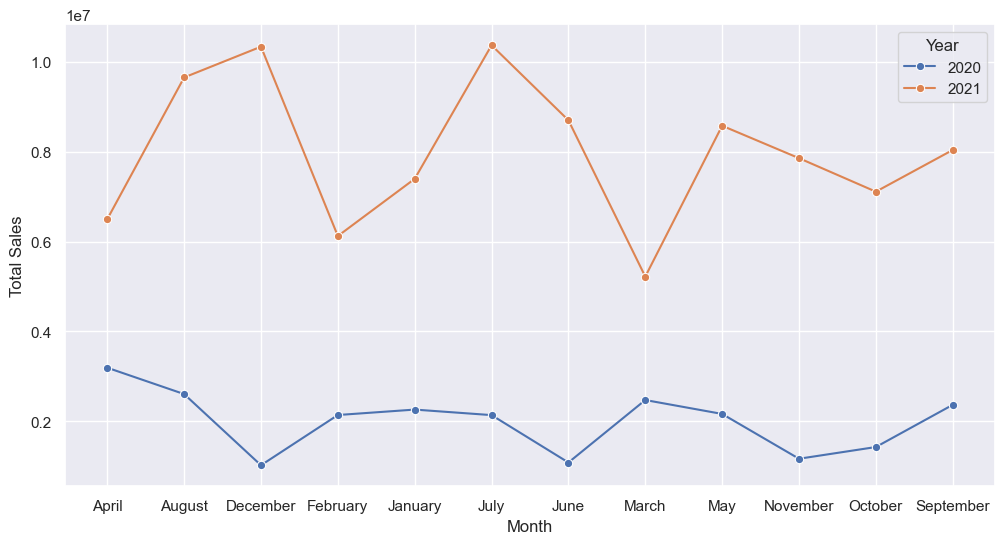

In [142]:
# What is total sales of each year ?

sales_by_month = df.groupby(['Year','Month'])['Total Sales'].sum().reset_index()

# create plot
plt.figure(figsize = (12,6))
sns.lineplot(x = "Month", y = "Total Sales", hue = "Year", data = sales_by_month, marker='o')

plt.show()

- In `2021`, sales were much higher than in `2020`, and the main reason for this was Covid-19.

C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\3150904291.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonSales = df.groupby(['Season', 'Product'])['Units Sold'].sum().reset_index().sort_values(


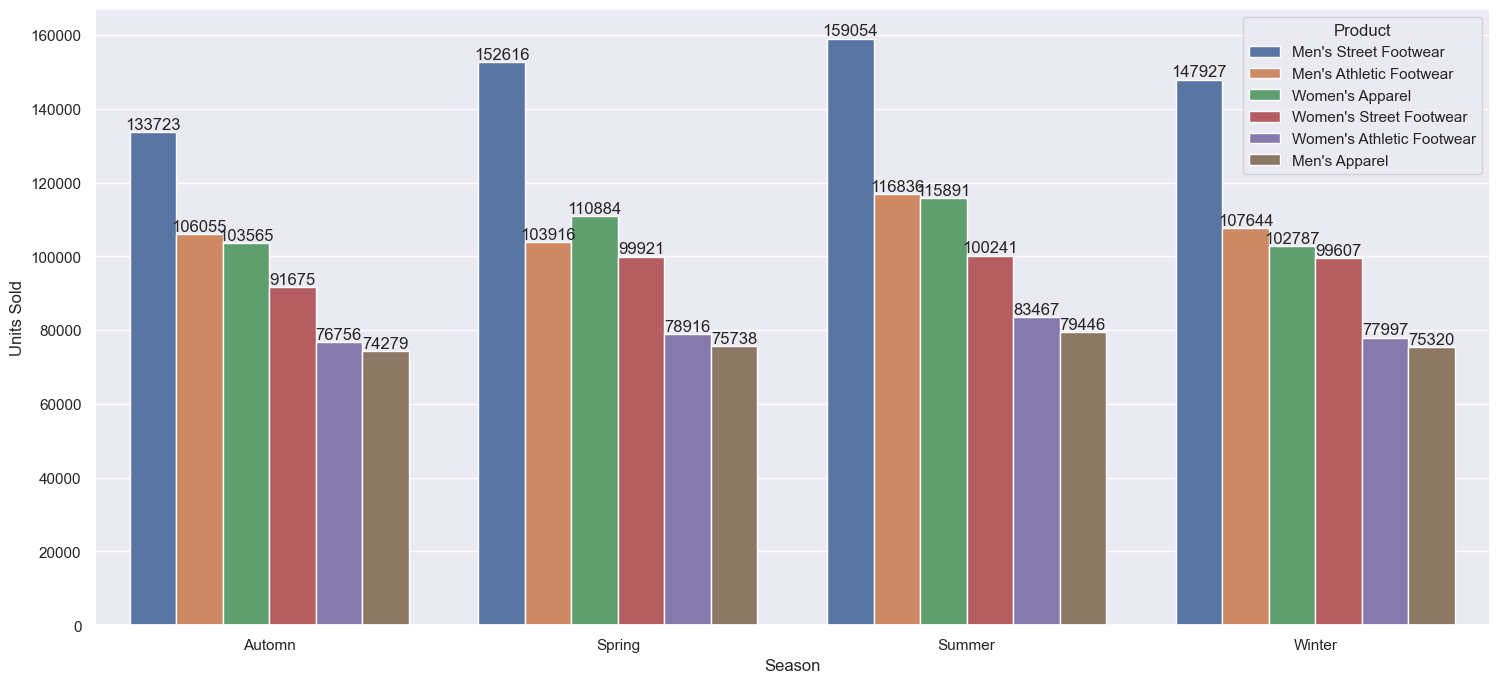

In [143]:
# Does the sale of a particular product increase or decrease during the seasons?

seasonSales = df.groupby(['Season', 'Product'])['Units Sold'].sum().reset_index().sort_values(
                                                                                        by = 'Units Sold', ascending = False)

# create plot
plt.figure(figsize = (18,8))
graph = sns.barplot(x = "Season", y = "Units Sold", hue = 'Product', data = seasonSales)
for container in graph.containers:
    graph.bar_label(container)
    
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\4075588067.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonSalesMethod = df.groupby(['Season', 'Sales Method']).agg(Count = ('Sales Method', 'count'))


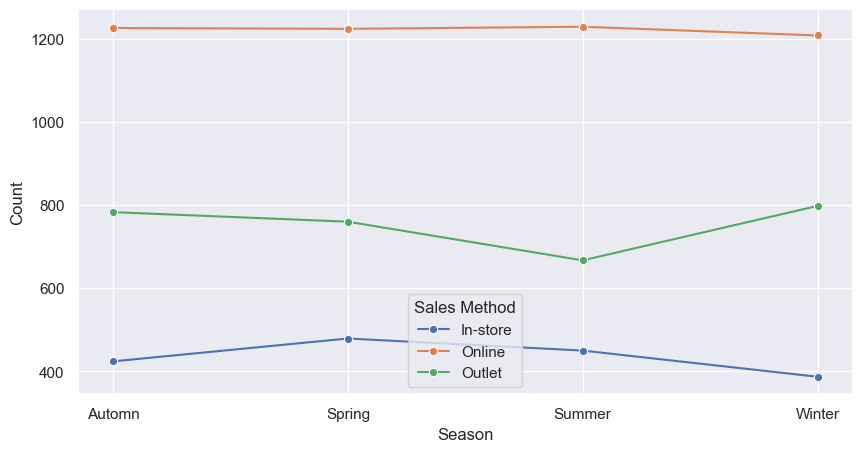

In [144]:
# Does the Sales Method increase or decrease during seasons?

seasonSalesMethod = df.groupby(['Season', 'Sales Method']).agg(Count = ('Sales Method', 'count'))

# create plot
plt.figure(figsize = (10,5))
sns.lineplot(x = "Season", y = "Count", hue = 'Sales Method', data = seasonSalesMethod, marker='o')

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2148\4096128690.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  return df.groupby(columnName).agg({'Total Sales' : sum, 'Operating Profit' : 'sum'})


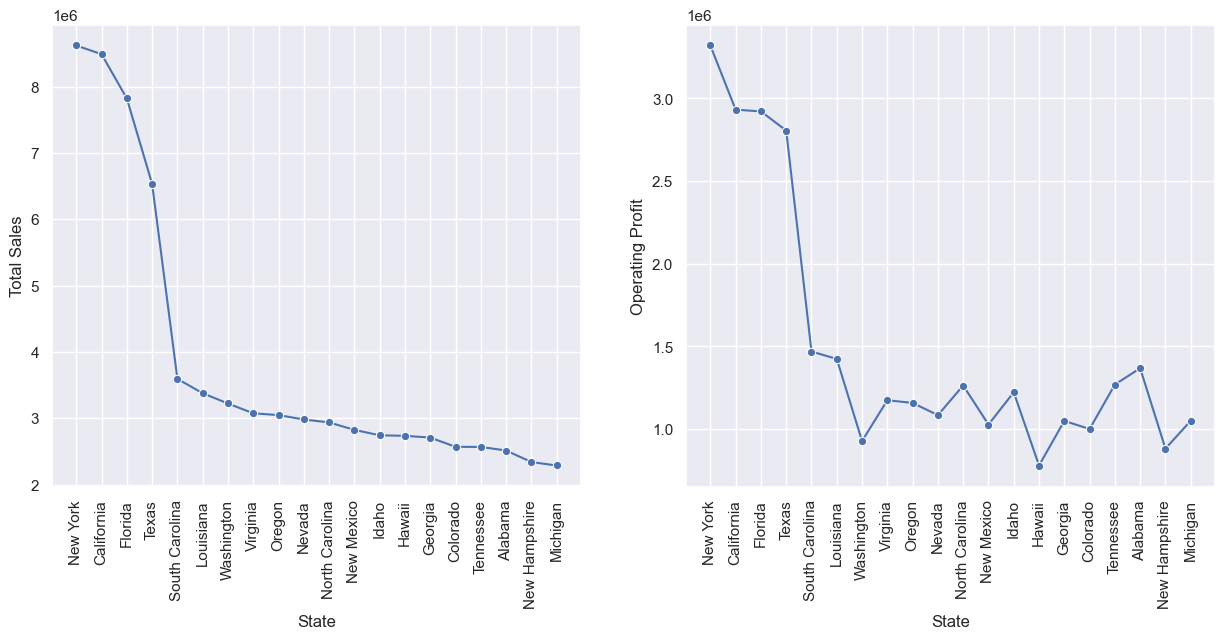

In [145]:
# What is the distribution of sales by top 20 state and city?

stateSales = groupData('State').sort_values(by = 'Total Sales', ascending = False)[:20]

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales 
plt.subplot(1, 2, 1)
sns.lineplot(x = stateSales.index, y = "Total Sales", data = stateSales, marker = "o")
plt.xticks(rotation = 90)


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = stateSales.index, y = "Operating Profit", data = stateSales, marker='o')
plt.xticks(rotation = 90)

plt.show()

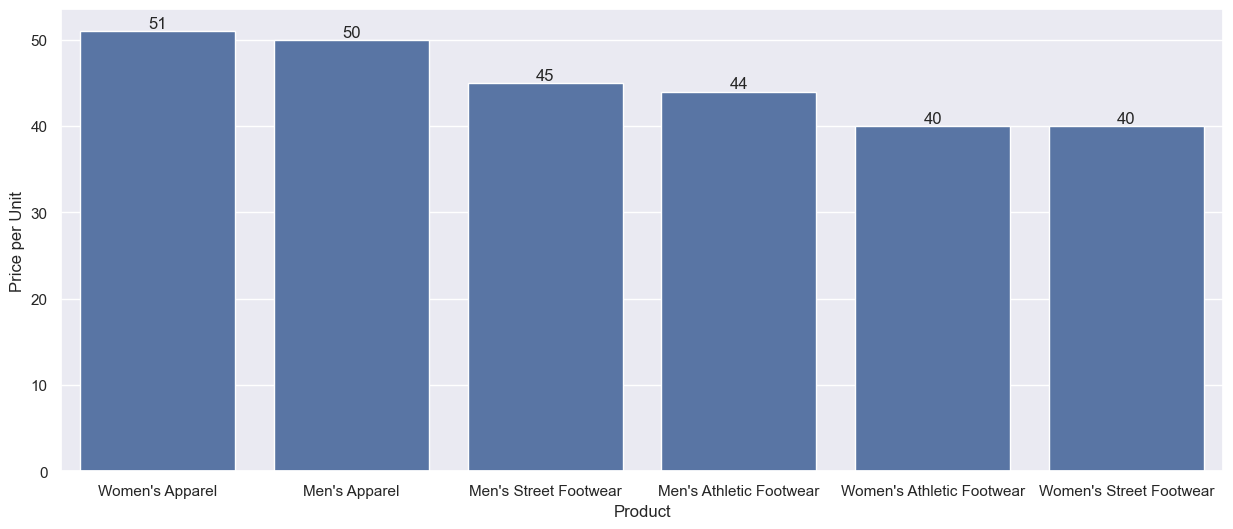

In [147]:
# What is the average price of products per unit ?

productsPerUnit = df.groupby('Product')['Price per Unit'].median().reset_index().sort_values(
                                                                                    by = 'Price per Unit', ascending = False)

plt.figure(figsize = (15,6))
graph = sns.barplot(x = 'Product', y = 'Price per Unit', data = productsPerUnit)

for container in graph.containers:
    graph.bar_label(container)

plt.show()